# Customer Churn  Prediction 

   Please do Vote up if you liked my work<br>
   Linkedin : https://www.linkedin.com/in/musab-jaleel-15418515b <br>
   Git : https://github.com/Musab9860576525 <br>
___   
## AIM:
In this Project,On the basis of various attributes related to customers such as tenure, gender, Senior citizen, Total charges and Monthly charges etc... i am building a ML model which can predict wether a customer will churn or not after training the model on the dataset.

___
## USE:
With this model ,the company can identify a customer which can be churn before his actual churning.
Thus, enables the company to treat those customers individually and reduce company customer loss which is eevntually a profit loss. 
___

## Applied Models:
1) Logistic Regression<br>
2) Desicion Tree Classifier<br>
3) Random Forest Classifier<br>
4) KNN<br>
5) Navie Byes 

|Model|Recall|Precision|f1 Score|
|-----|------|---------|--------|
|Logistic Regression|0.91|0.91|0.91|
|Desicion Tree|0.87|0.83|0.83|
|Random Forest|0.93|0.93|0.93|
|KNN|0.78|0.82|0.76|
|Navie byes|0.88|0.88|0.87|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Work\Downloads\churn (1).csv')

### Data Preproccessing

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data[data['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
data[data.iloc[:,:]== " "] = np.nan

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data.TotalCharges = data.TotalCharges.astype(float)

In [10]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data.drop('customerID',axis=1,inplace=True)

In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Visualisation

<AxesSubplot:xlabel='Contract', ylabel='count'>

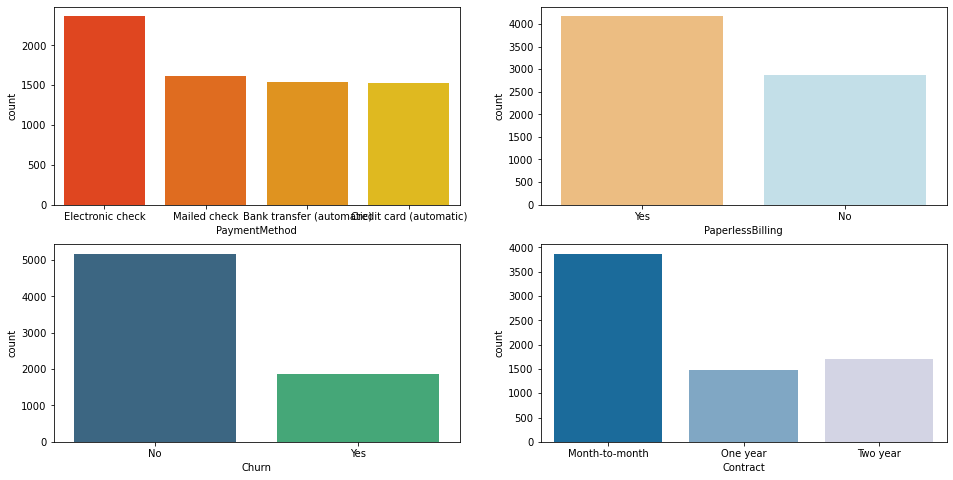

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,4)
sns.countplot(data=data,x='Contract',palette='PuBu_r')
plt.subplot(2,2,2)
sns.countplot(data=data,x='PaperlessBilling',palette='RdYlBu')
plt.subplot(2,2,1)
sns.countplot(data=data,x='PaymentMethod',palette='autumn')

plt.subplot(2,2,3)
sns.countplot(data=data,x='Churn',palette='viridis')
plt.subplot(2,2,4)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

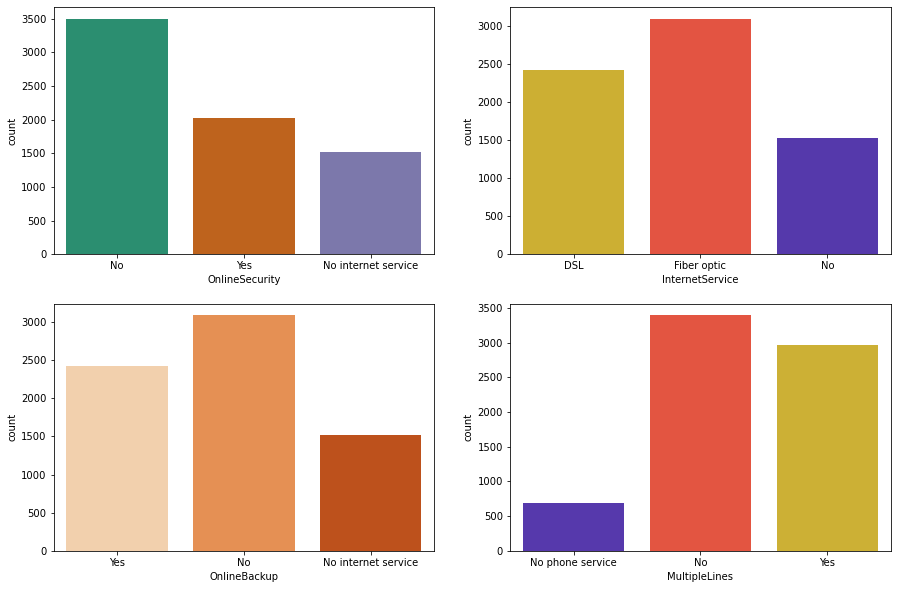

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
sns.countplot(data=data,x='MultipleLines',palette='CMRmap')
plt.subplot(2,2,2)
sns.countplot(data=data,x='InternetService',palette='CMRmap_r')
plt.subplot(2,2,1)
sns.countplot(data=data,x='OnlineSecurity',palette='Dark2')
plt.subplot(2,2,3)
sns.countplot(data=data,x='OnlineBackup',palette='Oranges')
plt.subplot(2,2,4)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

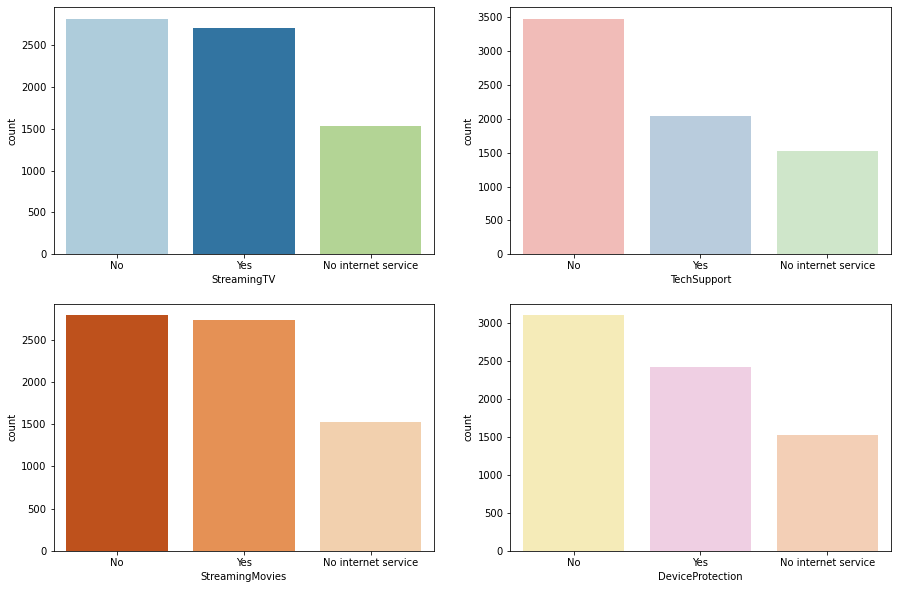

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,4)
sns.countplot(data=data,x='DeviceProtection',palette='Pastel2_r')
plt.subplot(2,2,2)
sns.countplot(data=data,x='TechSupport',palette='Pastel1')
plt.subplot(2,2,1)
sns.countplot(data=data,x='StreamingTV',palette='Paired')
plt.subplot(2,2,3)
sns.countplot(data=data,x='StreamingMovies',palette='Oranges_r')
plt.subplot(2,2,4)

<AxesSubplot:xlabel='gender', ylabel='count'>

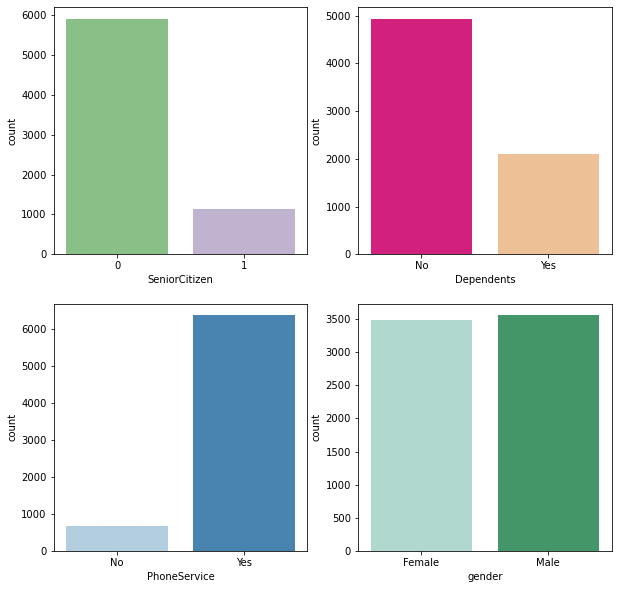

In [18]:

plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
sns.countplot(data=data,x='gender',palette='BuGn')
plt.subplot(2,2,2)
sns.countplot(data=data,x='Dependents',palette='Accent_r')
plt.subplot(2,2,1)
sns.countplot(data=data,x='SeniorCitizen',palette='Accent')
plt.subplot(2,2,3)
sns.countplot(data=data,x='PhoneService',palette='Blues')
plt.subplot(2,2,4)




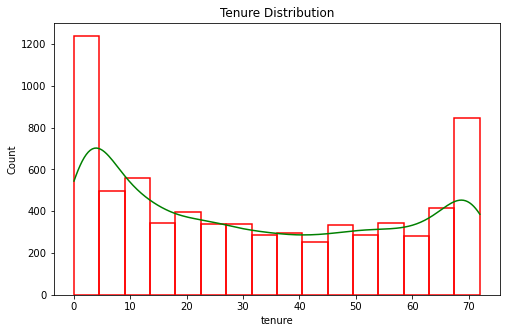

In [19]:
plt.figure(figsize=(8,5))
plt.title('Tenure Distribution')
ax = sns.histplot(data=data,kde=True,x='tenure',color='red',fill=False,)
ax.lines[0].set_color('green')

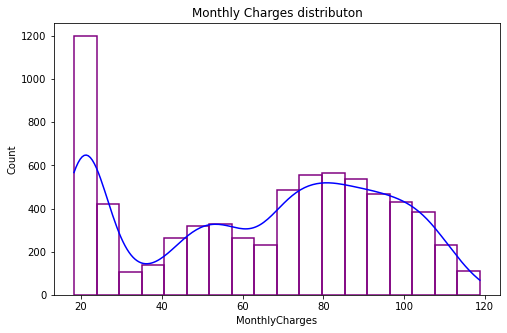

In [20]:
plt.figure(figsize=(8,5))
plt.title('Monthly Charges distributon')
ax = sns.histplot(data=data,x='MonthlyCharges',color="purple",fill=False,kde=True)
ax.lines[0].set_color('blue')

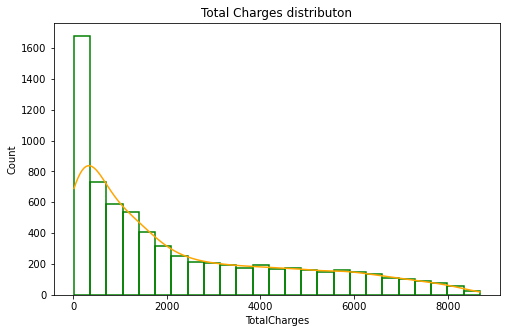

In [21]:
plt.figure(figsize=(8,5))
plt.title('Total Charges distributon')
ax = sns.histplot(data=data,x='TotalCharges',color="green",fill=False,kde=True)
ax.lines[0].set_color('orange')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

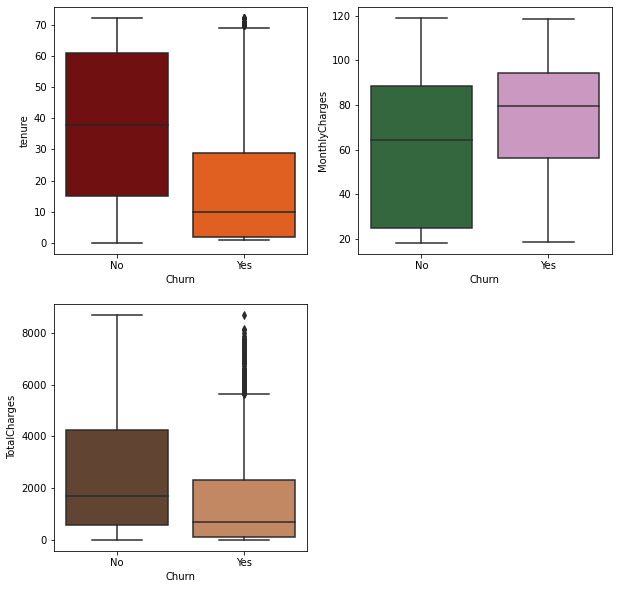

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='Churn',y='tenure',palette='gist_heat')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='Churn',y='MonthlyCharges',palette='cubehelix')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='Churn',y='TotalCharges',palette='copper')



<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

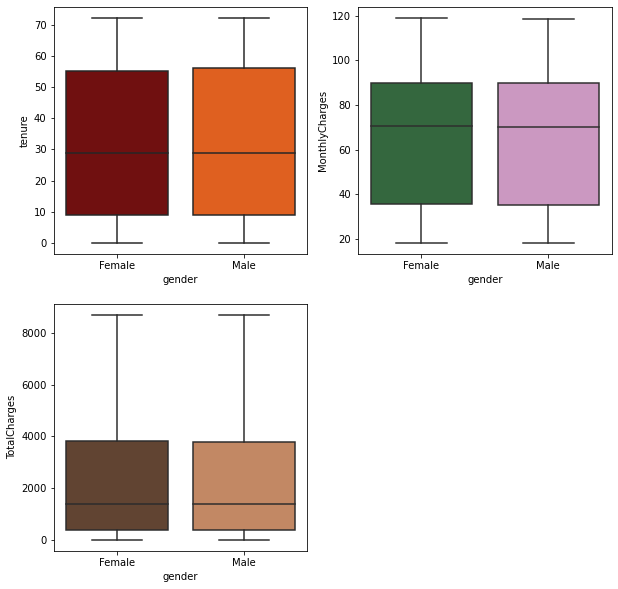

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='gender',y='tenure',palette='gist_heat')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='gender',y='MonthlyCharges',palette='cubehelix')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='gender',y='TotalCharges',palette='copper')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

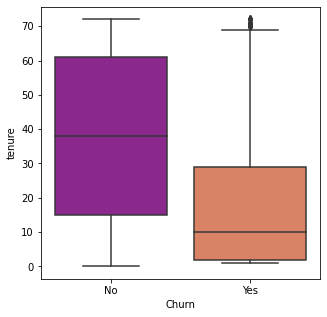

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data,x='Churn',y='tenure',palette='plasma')

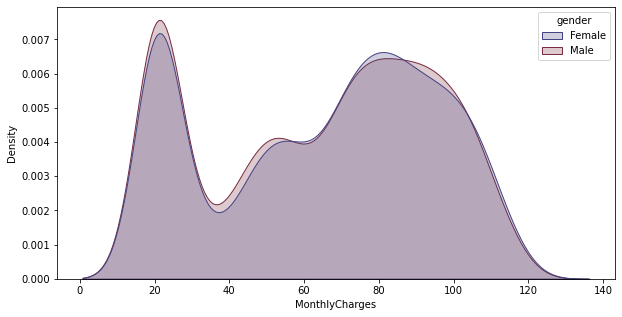

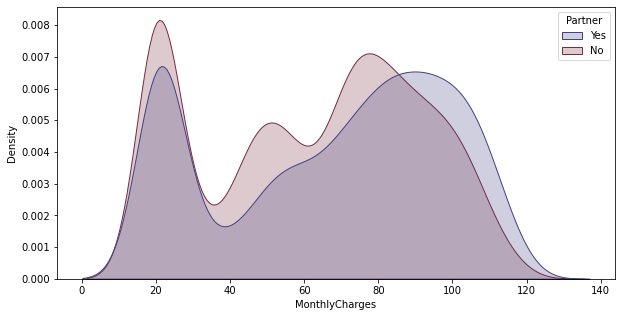

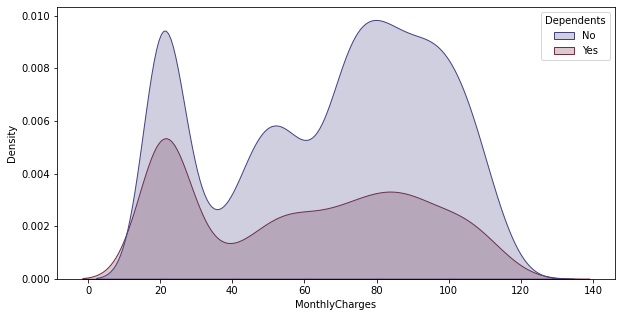

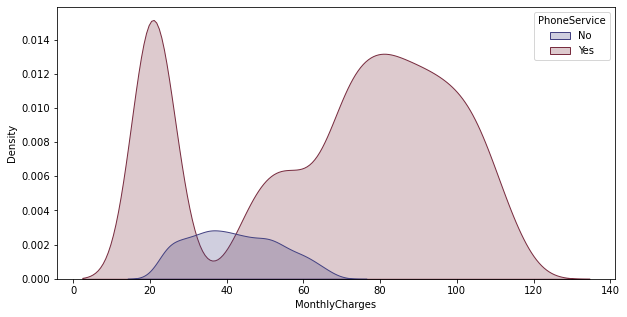

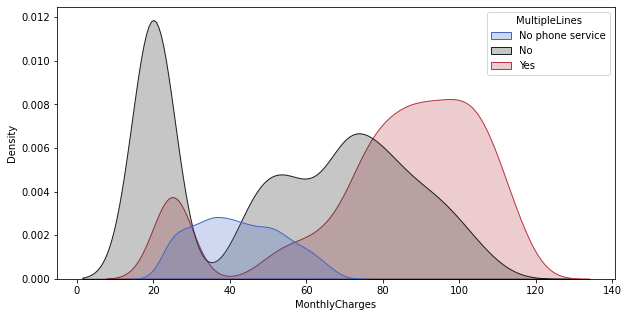

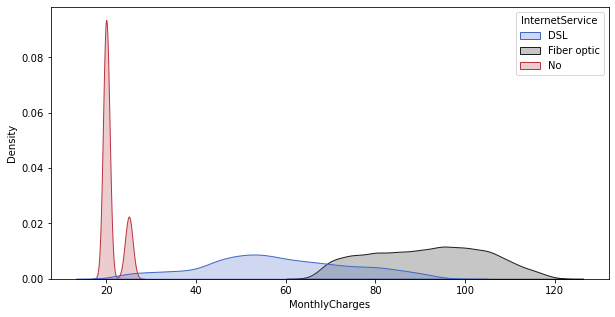

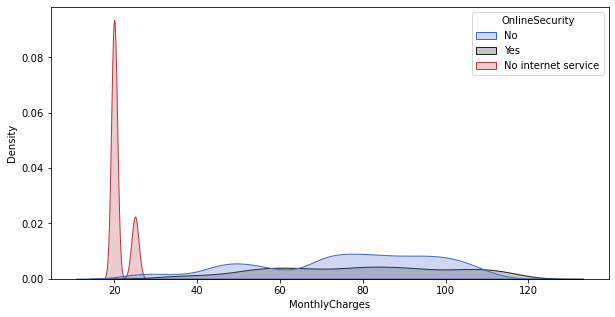

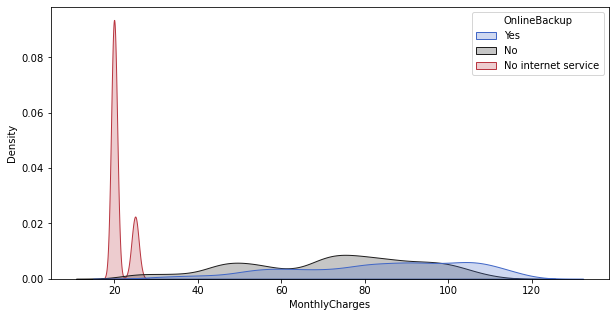

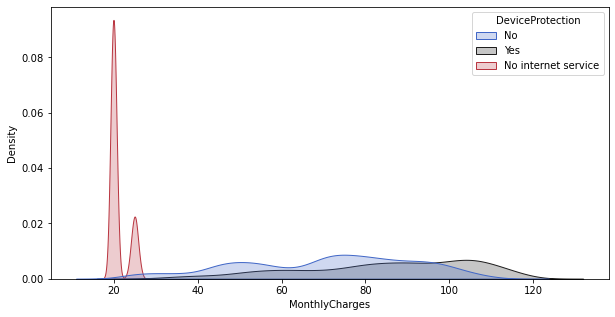

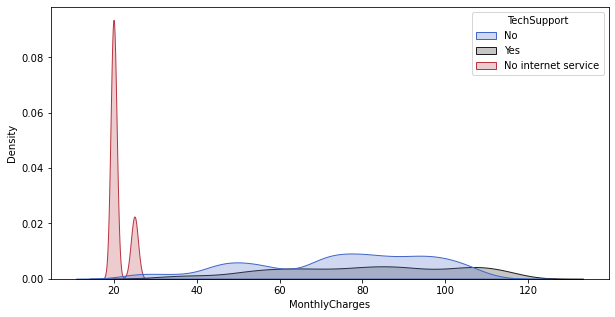

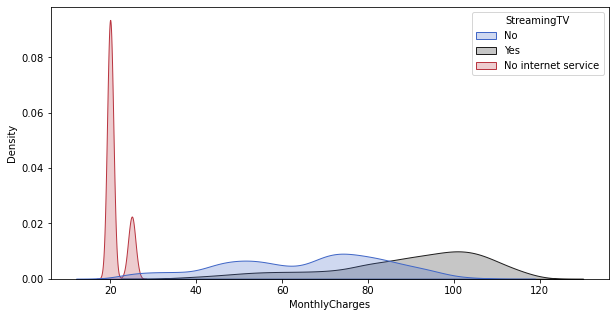

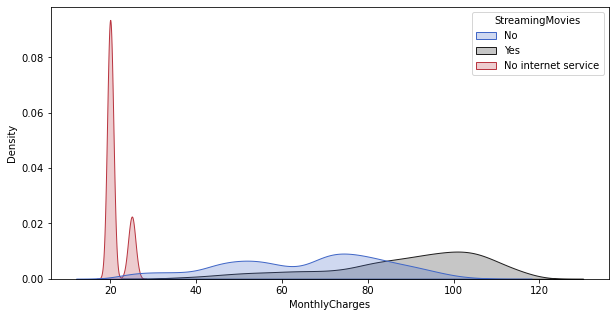

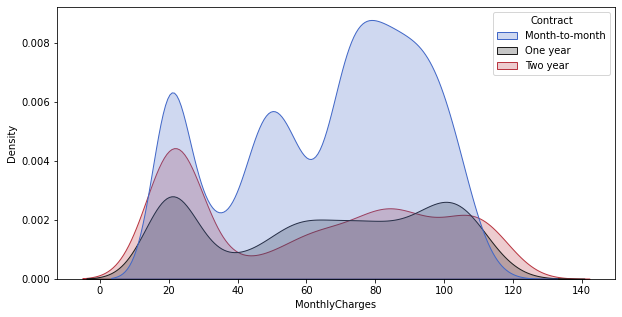

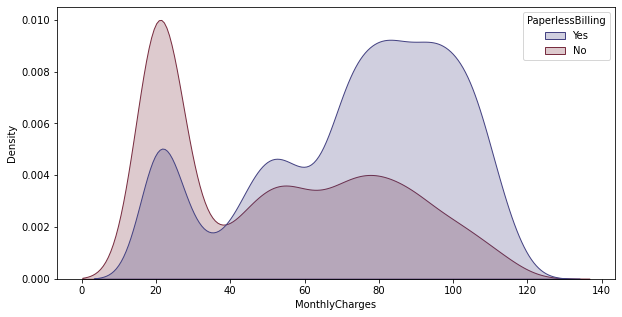

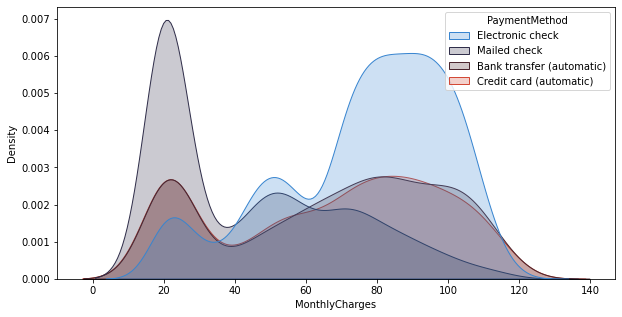

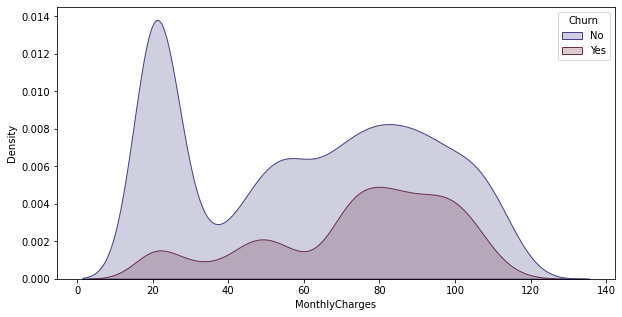

In [25]:
for i in data.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=data,x='MonthlyCharges',hue=i,fill=True,palette='icefire')
    

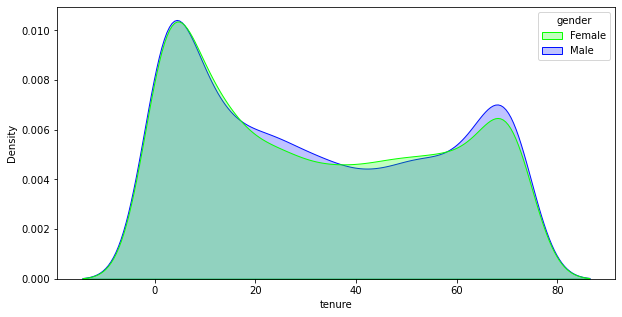

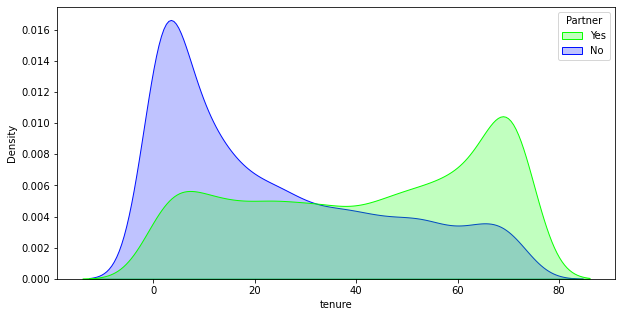

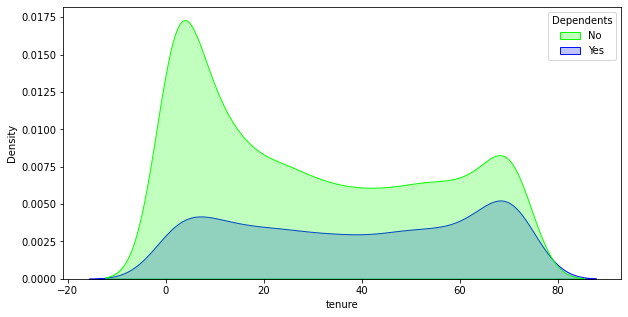

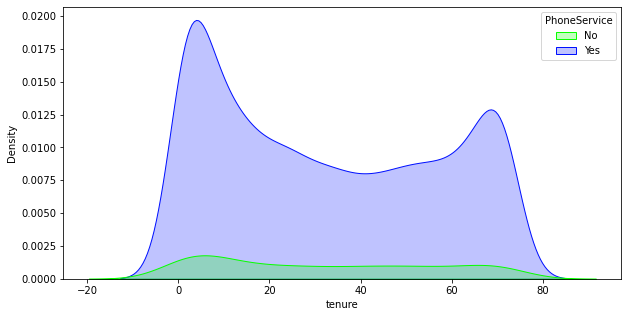

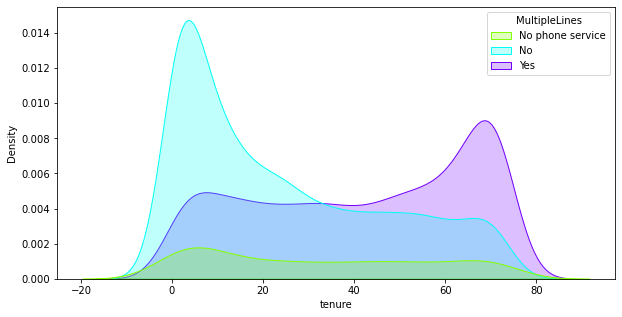

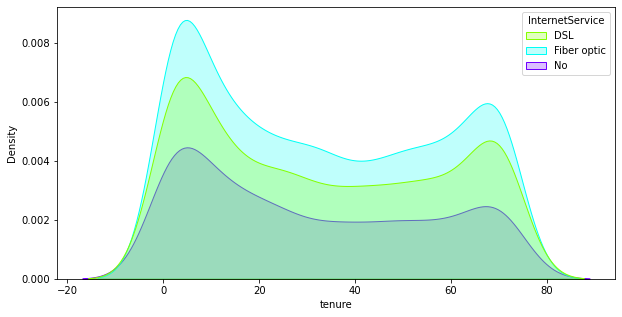

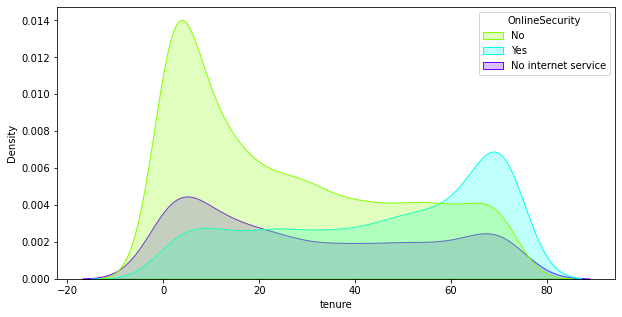

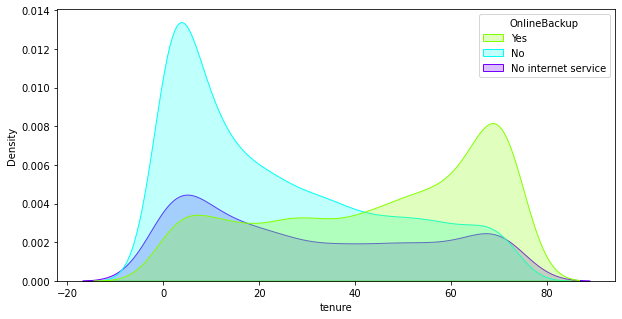

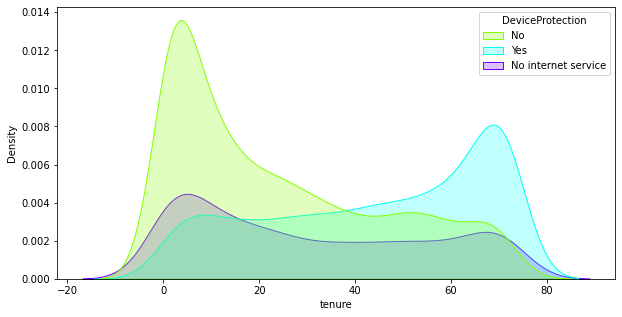

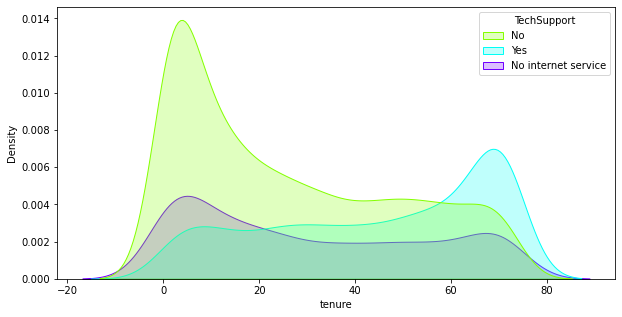

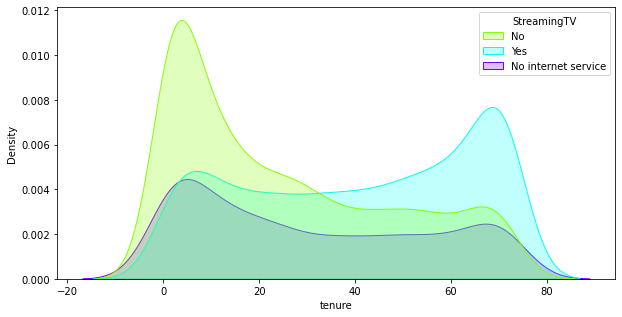

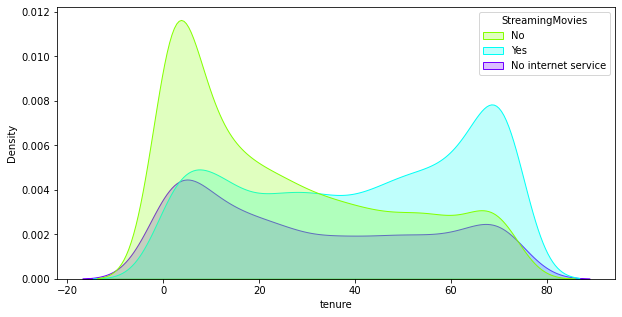

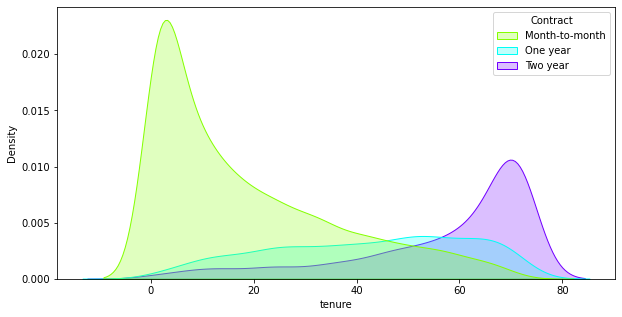

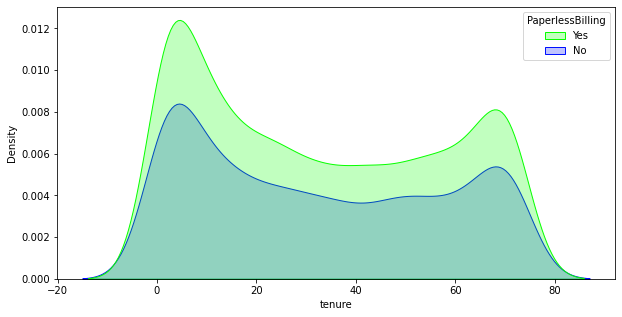

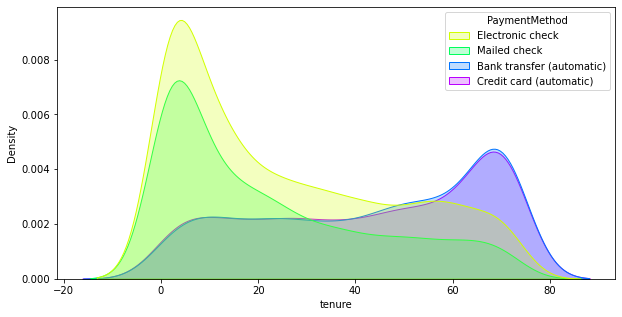

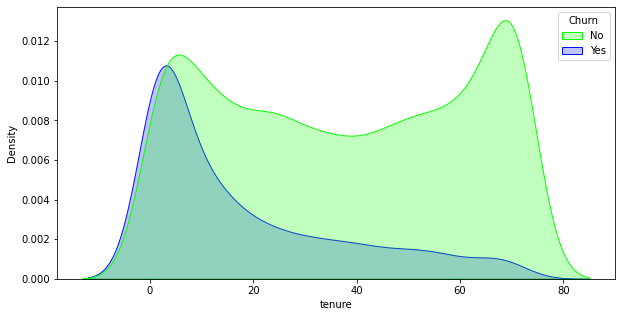

In [26]:
for i in data.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=data,x='tenure',hue=i,fill=True,palette='hsv')
    

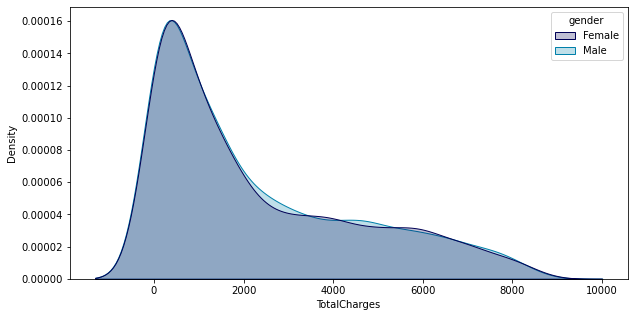

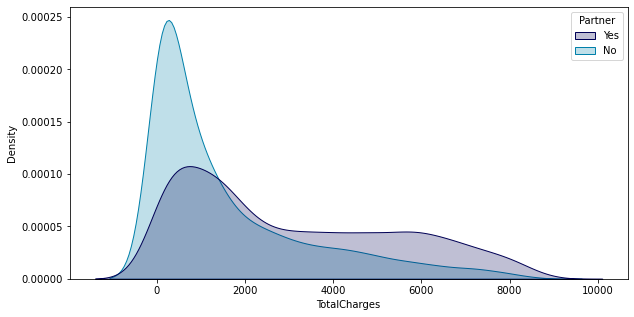

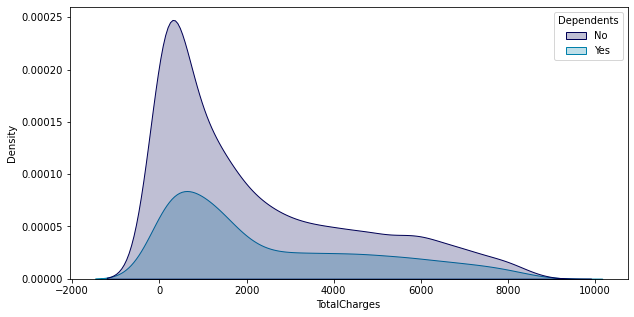

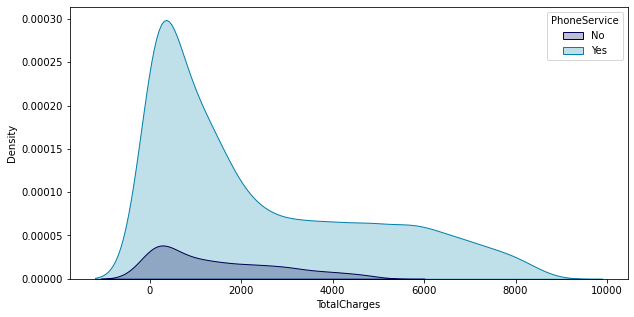

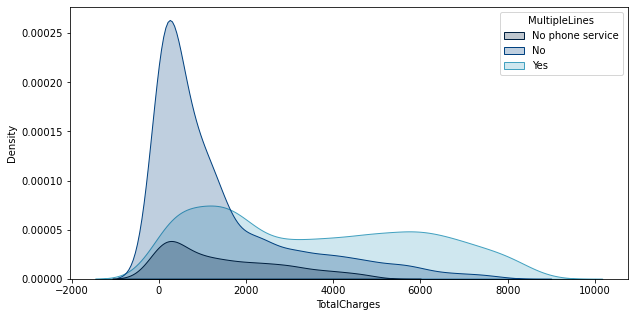

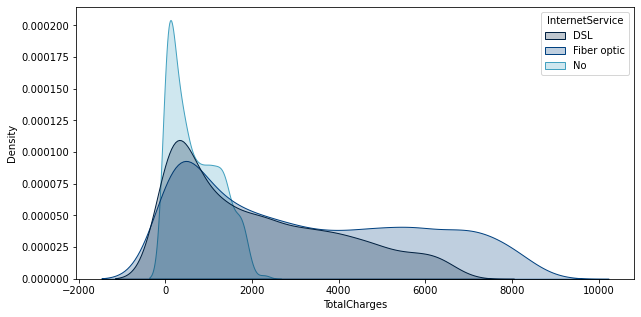

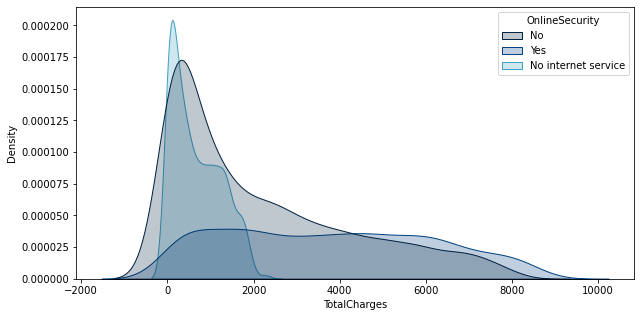

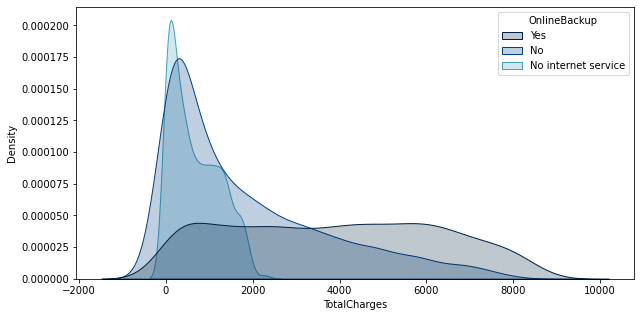

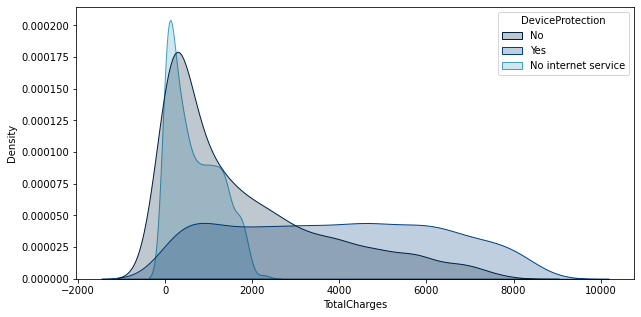

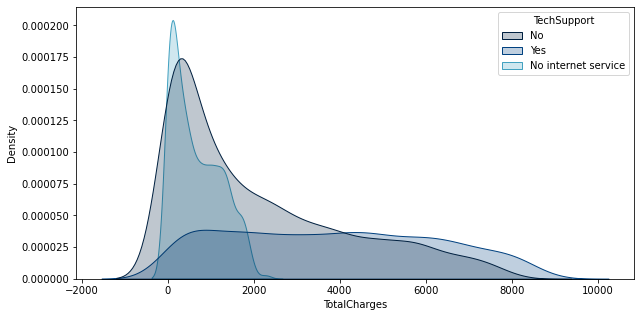

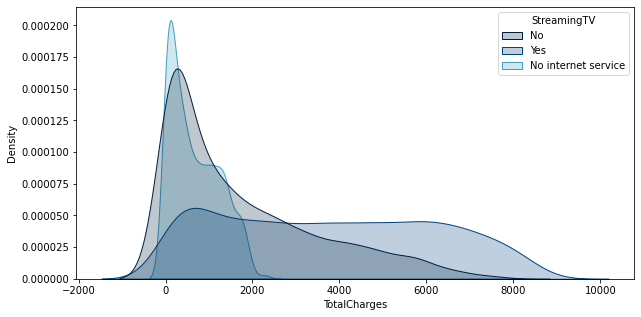

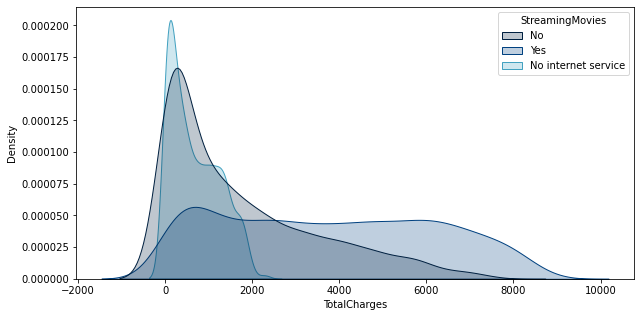

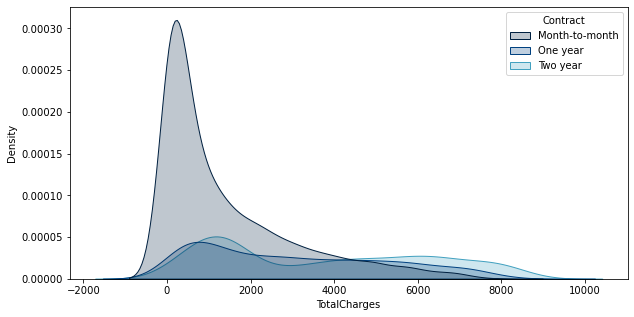

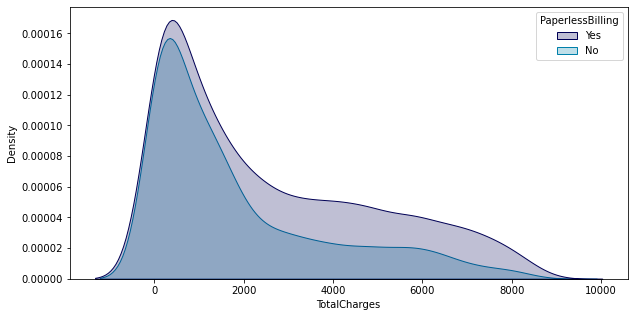

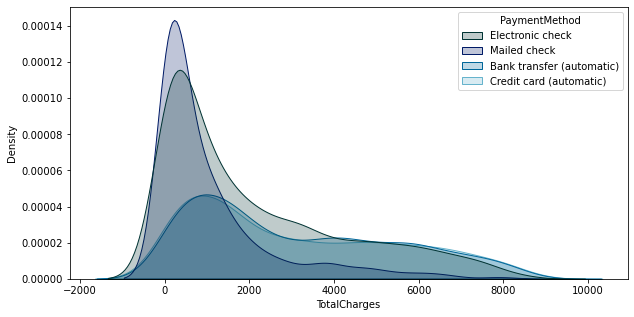

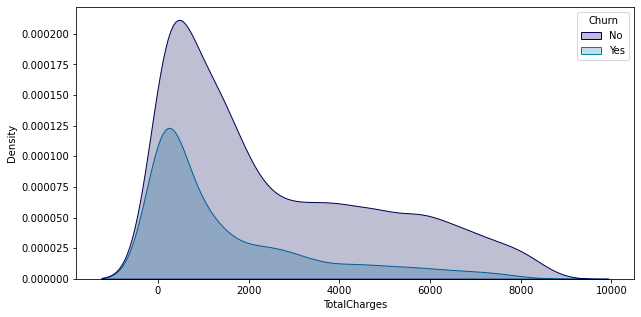

In [27]:
for i in data.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=data,x='TotalCharges',hue=i,fill=True,palette='ocean')
    

### Converting all the categorical columns into 1's and 0's by using Sklearn Label Encoder

In [160]:
from sklearn.preprocessing import LabelEncoder

In [161]:
encoder = LabelEncoder()

In [163]:
data=data.apply(encoder.fit_transform)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

### Before training models which involves concept of 'Euclidean distance' and 'Gradient Disscent' ,data must need to be scaled down to bring all the numerical features to one scale.

In [174]:
data_neumer = data[['tenure','TotalCharges','MonthlyCharges']]

In [175]:
data_neumer.head()

,tenure,TotalCharges,MonthlyCharges
0,1,74,142
1,34,3624,498
2,2,536,436
3,45,3570,266
4,2,674,729


In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

In [176]:
data_neumer_scaled = scaler.fit_transform(data_neumer)

In [177]:
data_neumer = pd.DataFrame(data_neumer_scaled,columns=data_neumer.columns)

In [179]:
data_neumer.head()

,tenure,TotalCharges,MonthlyCharges
0,0.013889,0.011332,0.089646
1,0.472222,0.554977,0.314394
2,0.027778,0.082083,0.275253
3,0.625000,0.546708,0.167929
4,0.027778,0.103216,0.460227


In [182]:
data.drop(['tenure','TotalCharges','MonthlyCharges'],axis=1,inplace=True)

In [183]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [184]:
data=pd.concat([data,data_neumer],axis=1)

In [186]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,TotalCharges,MonthlyCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0.013889,0.011332,0.089646
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.472222,0.554977,0.314394
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0.027778,0.082083,0.275253
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.625000,0.546708,0.167929
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0.027778,0.103216,0.460227


In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Churn',axis=1),data['Churn'],test_size=0.3,random_state=42)

In [189]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,TotalCharges,MonthlyCharges
1695,1,0,1,1,1,2,0,0,2,0,2,2,0,1,1,2,0.750000,0.730322,0.460227
1095,1,0,0,0,1,0,1,0,0,0,0,2,0,0,1,2,0.013889,0.061409,0.575126
3889,1,0,0,0,1,0,2,1,1,1,1,1,1,1,0,1,0.180556,0.157580,0.009470
3667,0,1,1,1,1,0,1,0,0,2,0,2,2,2,1,2,0.333333,0.596631,0.768939
2902,0,1,0,0,1,0,1,2,0,0,0,0,0,0,1,2,0.083333,0.228943,0.498106


In [190]:
y_train.head()

1695    0
1095    0
3889    0
3667    0
2902    0
Name: Churn, dtype: int64

### Model Building
1) Logistics Regression

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [214]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_lr = LR.predict(x_test)

print('model Accuracy score :',accuracy_score(y_test,y_pred_lr))
print('Precision',precision_score(y_test,y_pred_lr))
print('classification report\n',classification_report(y_test,y_pred_lr))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred_lr))

model Accuracy score : 0.808329389493611
Precision 0.6857142857142857
classification report
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.54      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Confusion Matrix :
 [[1396  143]
 [ 262  312]]


<b>2) Desicion Tree Classifier</b>

In [194]:
from sklearn.tree import DecisionTreeClassifier 

In [330]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_test)

print('model Accuracy score :',accuracy_score(y_test,y_pred_dt))
print('Precision',precision_score(y_test,y_pred_dt))
print('classification report\n',classification_report(y_test,y_pred_dt))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred_dt))

model Accuracy score : 0.7401798390913393
Precision 0.5229357798165137
classification report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1539
           1       0.52      0.50      0.51       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.67      2113
weighted avg       0.74      0.74      0.74      2113

Confusion Matrix :
 [[1279  260]
 [ 289  285]]


<b>3) Random Forest Classiifer</b>

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_rf = RF.predict(x_test)

print('model Accuracy score :',accuracy_score(y_test,y_pred_rf))
print('Precision',precision_score(y_test,y_pred_rf))
print('classification report\n',classification_report(y_test,y_pred_rf))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred_rf))

model Accuracy score : 0.795551348793185
Precision 0.6723300970873787
classification report
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.48      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.80      0.78      2113

Confusion Matrix :
 [[1404  135]
 [ 297  277]]


<b>4) Naive Byes</b>

In [198]:
from sklearn.naive_bayes import GaussianNB 

In [217]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)

print('model Accuracy score :',accuracy_score(y_test,y_pred_gnb))
print('Precision',precision_score(y_test,y_pred_gnb))
print('classification report\n',classification_report(y_test,y_pred_gnb))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred_gnb))

model Accuracy score : 0.7600567912920019
Precision 0.5417185554171855
classification report
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1539
           1       0.54      0.76      0.63       574

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113

Confusion Matrix :
 [[1171  368]
 [ 139  435]]


<b>5) K Nearst Neighbour classifier 

In [200]:
from sklearn.neighbors import KNeighborsClassifier 

In [201]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


print('model Accuracy score :',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('classification report\n',classification_report(y_test,y_pred))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred))

model Accuracy score : 0.7557974443918599
Precision 0.5587044534412956
classification report
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1539
           1       0.56      0.48      0.52       574

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113

Confusion Matrix :
 [[1321  218]
 [ 298  276]]


In [202]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error')

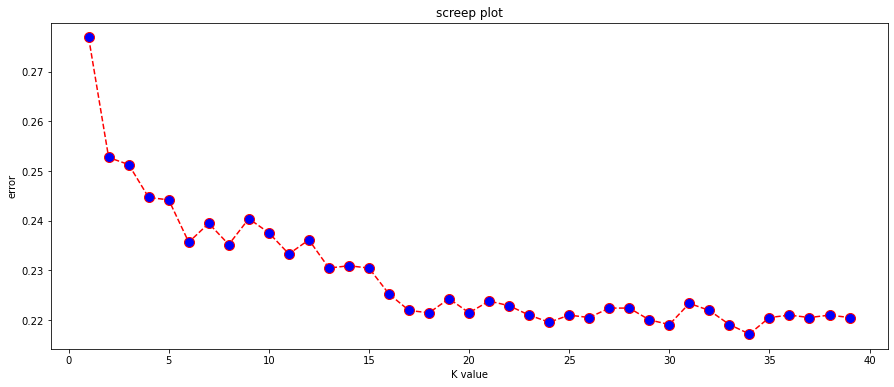

In [203]:
plt.figure(figsize=(15,6))
plt.title('screep plot')
plt.plot(range(1,40),error,linestyle='dashed',color='red',marker='o',markersize=10,markerfacecolor='blue')
plt.xlabel('K value')
plt.ylabel('error')

In [204]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


print('model Accuracy score :',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('classification report\n',classification_report(y_test,y_pred))
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred))

model Accuracy score : 0.7785139611926172
Precision 0.6177777777777778
classification report
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1539
           1       0.62      0.48      0.54       574

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Confusion Matrix :
 [[1367  172]
 [ 296  278]]


In [332]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,TotalCharges,MonthlyCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0.013889,0.011332,0.089646
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.472222,0.554977,0.314394
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0.027778,0.082083,0.275253
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.625000,0.546708,0.167929
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0.027778,0.103216,0.460227


In [338]:
print('size of data when customer churns        :',data[data['Churn']==1].shape[0])
print('size of data when customer do not churns :',data[data['Churn']==0].shape[0])

size of data when customer churns        : 1869
size of data when customer do not churns : 5174


### Data is highly Imbalanced
1) In this data not churns to churn ratio is 2.76<br>
2) That means for every 1 churn customers there are 2.76 customers those are not churning.<br>
3) For getting good precision as well as recall for both classes we need to balance the data 

### Balancing Technique
1) Balancing is done by a library called as imbalance learn(imblearn)<br>
2) Within this library there are many balancing techniques,for this data we use <b>SMOTEENN</b> technique

In [279]:
x=data.drop('Churn',axis=1)

In [280]:
y=data['Churn']

In [281]:
from imblearn.combine import SMOTEENN

In [282]:
smnn = SMOTEENN()

In [283]:
x_res,y_res=smnn.fit_resample(x,y)

In [284]:
x_train_res,x_test_res,y_train_res,y_test_res = train_test_split(x_res,y_res,test_size=0.2,random_state=45)

In [285]:
print(x_train_res.shape)
print(y_train_res.shape)

print('\ncount of 1 in resampled y_train',y_train_res[y_train_res==1].shape)
print('count of 0 in resampled y_train',y_train_res[y_train_res==0].shape)

(4955, 19)
(4955,)

count of 1 in resampled y_train (2777,)
count of 0 in resampled y_train (2178,)


<b>Now lets try all the models that we have trained on imbalanced data on balanced data</b>
1) Logistics Regression

In [302]:
LR_res = LogisticRegression()
LR_res.fit(x_train_res,y_train_res)
y_pred_lr_res = LR_res.predict(x_test_res)

print('model Accuracy score :',accuracy_score(y_test_res,y_pred_lr_res))
print('Precision',precision_score(y_test_res,y_pred_lr_res))
print('classification report\n',classification_report(y_test_res,y_pred_lr_res))
print('Confusion Matrix :\n',confusion_matrix(y_test_res,y_pred_lr_res))

model Accuracy score : 0.9071832122679581
Precision 0.9105571847507331
classification report
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       564
           1       0.91      0.92      0.92       675

    accuracy                           0.91      1239
   macro avg       0.91      0.91      0.91      1239
weighted avg       0.91      0.91      0.91      1239

Confusion Matrix :
 [[503  61]
 [ 54 621]]


2) Desicion tree classifier

In [299]:
DT_res = DecisionTreeClassifier()
DT_res.fit(x_train,y_train)
y_pred_dt_res = DT_res.predict(x_test_res)

print('model Accuracy score :',accuracy_score(y_test_res,y_pred_dt_res))
print('Precision',precision_score(y_test_res,y_pred_dt_res))
print('classification report\n',classification_report(y_test_res,y_pred_dt_res))
print('Confusion Matrix :\n',confusion_matrix(y_test_res,y_pred_dt_res))

model Accuracy score : 0.8321226795803067
Precision 0.9794661190965093
classification report
               precision    recall  f1-score   support

           0       0.74      0.98      0.84       564
           1       0.98      0.71      0.82       675

    accuracy                           0.83      1239
   macro avg       0.86      0.84      0.83      1239
weighted avg       0.87      0.83      0.83      1239

Confusion Matrix :
 [[554  10]
 [198 477]]


3) K Nearest Neighbour

In [300]:
knn_res = KNeighborsClassifier()
knn_res.fit(x_train,y_train)
y_pred_knn_res = knn.predict(x_test_res)


print('model Accuracy score :',accuracy_score(y_test_res,y_pred_knn_res))
print('Precision',precision_score(y_test_res,y_pred_knn_res))
print('classification report\n',classification_report(y_test_res,y_pred_knn_res))
print('Confusion Matrix :\n',confusion_matrix(y_test_res,y_pred_knn_res))

model Accuracy score : 0.7627118644067796
Precision 0.9774436090225563
classification report
               precision    recall  f1-score   support

           0       0.66      0.98      0.79       564
           1       0.98      0.58      0.73       675

    accuracy                           0.76      1239
   macro avg       0.82      0.78      0.76      1239
weighted avg       0.83      0.76      0.76      1239

Confusion Matrix :
 [[555   9]
 [285 390]]


4) Naive Bye 

In [301]:
gnb_res = GaussianNB()
gnb_res.fit(x_train_res,y_train_res)
y_pred_gnb_res = gnb.predict(x_test_res)

print('model Accuracy score :',accuracy_score(y_test_res,y_pred_gnb_res))
print('Precision',precision_score(y_test_res,y_pred_gnb_res))
print('classification report\n',classification_report(y_test_res,y_pred_gnb_res))
print('Confusion Matrix :\n',confusion_matrix(y_test_res,y_pred_gnb_res))

model Accuracy score : 0.87409200968523
Precision 0.9544658493870403
classification report
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       564
           1       0.95      0.81      0.87       675

    accuracy                           0.87      1239
   macro avg       0.88      0.88      0.87      1239
weighted avg       0.89      0.87      0.87      1239

Confusion Matrix :
 [[538  26]
 [130 545]]


5) Random Forest Classifier

In [286]:
RF = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
RF.fit(x_train_res,y_train_res)
y_pred = RF.predict(x_test_res)

print('model Accuracy score :',accuracy_score(y_test_res,y_pred))
print('Precision',precision_score(y_test_res,y_pred))
print('classification report\n',classification_report(y_test_res,y_pred,labels=[0,1]))
print('Confusion Matrix :\n',confusion_matrix(y_test_res,y_pred))

model Accuracy score : 0.9289749798224375
Precision 0.9235209235209235
classification report
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       564
           1       0.92      0.95      0.94       675

    accuracy                           0.93      1239
   macro avg       0.93      0.93      0.93      1239
weighted avg       0.93      0.93      0.93      1239

Confusion Matrix :
 [[511  53]
 [ 35 640]]


In [287]:
from sklearn.metrics import roc_curve 

In [304]:
y_pred_prob_RF=RF.predict_proba(x_test_res)
preds_RF=y_pred_prob[:,1]

y_pred_prob_LR=LR_res.predict_proba(x_test_res)
preds_LR=y_pred_prob_LR[:,1]

y_pred_prob_DT = DT_res.predict_proba(x_test_res)
preds_DT = y_pred_prob_DT[:,1]

y_pred_prob_knn = knn_res.predict_proba(x_test_res)
preds_knn = y_pred_prob_knn[:,1]

y_pred_prob_gnb = gnb_res.predict_proba(x_test_res)
preds_gnb=y_pred_prob_gnb[:,1]


In [305]:
fpr_RF,tpr_RF,thre_RF=roc_curve(y_test_res,preds_RF)
fpr_LR,tpr_LR,thre_LR=roc_curve(y_test_res,preds_LR)
fpr_DT,tpr_DT,thre_DT=roc_curve(y_test_res,preds_DT)
fpr_knn,tpr_knn,thre_knn=roc_curve(y_test_res,preds_knn)
fpr_gnb,tpr_gnb,thre_gnb=roc_curve(y_test_res,preds_gnb)

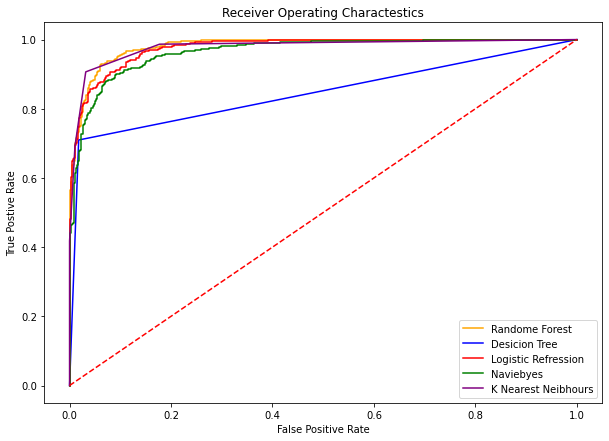

In [329]:
plt.figure(figsize=(10,7))
plt.plot(fpr_RF,tpr_RF,color='orange',label='Randome Forest')
plt.plot(fpr_DT,tpr_DT,'b',label='Desicion Tree')
plt.plot(fpr_LR,tpr_LR,'red',label='Logistic Refression')
plt.plot(fpr_gnb,tpr_gnb,'g',label='Naviebyes')
plt.plot(fpr_knn,tpr_knn,'purple',label='K Nearest Neibhours')
plt.plot([0,1],[0,1],"r--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Charactestics')
plt.legend()

<b>From ROC Curve it seems that Random Forest calssifier is out performing other calsssifiers </b>
